In [1]:
from numpy import *
from numpy.random import rand, randn, randint
from dPCA import dPCA
# sys.path.append('../ee_dpca.py');
import ee_dpca
import numpy as np
import sklearn.preprocessing
import matplotlib.pyplot as plt

In [2]:
trail_data = np.load('./ElectricityUsage.npy',encoding = "latin1")

# 把数据进行简单的切片操作看看效果，这样后面会快一点
trail_data = trail_data[:, :, :, :, :30]

print(trail_data.shape)
n_samples = 3
data = mean(trail_data,0)
# N = 370 
N = 30
data = data.transpose(3,1,2,0)
trail_data = trail_data.transpose(0,4,2,3,1)
print('data.shape',data.shape)
print('trail_data.shape',trail_data.shape)
# data -= mean(data.reshape((N,-1)),-1)[:,None,None,None]


(3, 12, 20, 96, 30)
data.shape (30, 20, 96, 12)
trail_data.shape (3, 30, 20, 96, 12)


In [3]:
print(np.mean(trail_data[:,:,:,1,1]))

68.01681


Text(0.5, 1.0, 'year')

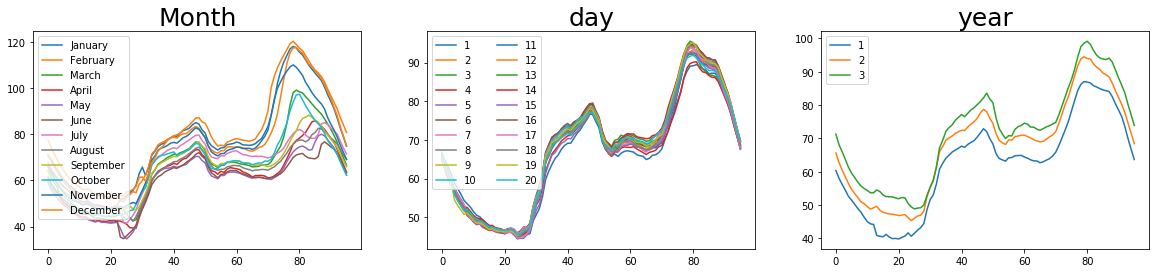

In [4]:
plt.figure(figsize=(20,4))
time_interval = np.arange(96)
month_label=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.subplot(131)
for month in range(12):
    month_list=[]
    for interval in range(96):
        month_list.append(np.mean(trail_data[:,:,:,interval,month]))
    plt.plot(time_interval, month_list,label=month_label[month])
plt.legend()
plt.title('Month',size=25)

plt.subplot(132)
for day in range(20):
    day_list=[]
    day_label=str(day+1)
    for interval in range(96):
        day_list.append(np.mean(trail_data[:,:,day,interval,:]))
    plt.plot(time_interval, day_list,label=day_label)
plt.legend(ncol=2)
plt.title('day',size=25)

plt.subplot(133)
for year in range(3):
    year_list=[]
    year_label=str(year+1)
    for interval in range(96):
        year_list.append(np.mean(trail_data[year,:,:,interval,:]))
    plt.plot(time_interval, year_list,label=year_label)
plt.legend()
plt.title('year',size=25)
# plt.savefig('./pics/month_day_year.jpg')



In [5]:
print(data)

[[[[  1.2690356   2.9610832   2.9610832 ...   7.6142125   2.538071
      7.1912007]
   [  2.9610832   2.5380712   3.8071067 ...   6.768189    2.9610832
      7.1912007]
   [  2.9610832   3.384095    7.1912007 ...   7.1912007   2.1150591
      7.1912007]
   ...
   [  7.6142125   6.768189    2.5380712 ...   7.1912007   7.6142125
      7.1912007]
   [  5.4991536   3.8071067   2.1150591 ...   7.6142125   6.768189
      6.768189 ]
   [  2.9610832   2.1150591   2.9610832 ...   7.1912007   8.037225
      7.1912007]]

  [[  2.5380712   1.6920475   2.5380712 ...   6.768189    7.6142125
      6.768189 ]
   [  2.5380712   1.6920475   2.5380712 ...   6.768189    6.768189
      7.6142125]
   [  2.9610832   2.1150591   2.9610832 ...   6.768189    6.768189
      6.345177 ]
   ...
   [  7.1912007   2.538071    2.1150591 ...   7.1912007   6.768189
      2.5380712]
   [  7.6142125   2.1150591   2.5380712 ...   7.1912007   7.6142125
      2.5380712]
   [  2.538071    2.9610832   2.1150591 ...   7.1912007

In [6]:
scaler = sklearn.preprocessing.MinMaxScaler()
for i in range(12):
    for j in range(20):
        data[i][j] = scaler.fit_transform(data[i][j])

In [7]:
print('begin dpca')
dpca_ex=dPCA.dPCA(labels='dim',regularizer=None)
dpca_ex.protect=['i']
Z_ex=dpca_ex.fit_transform(data,trail_data)
print('end dpca')

begin dpca
key: d
key: i
key: m
key: di
key: dm
key: im
key: dim
D[key] (30, 10)
D[key] (30, 10)
D[key] (30, 10)
D[key] (30, 10)
D[key] (30, 10)
D[key] (30, 10)
D[key] (30, 10)
end dpca


In [8]:
print(Z_ex['m'].shape)

(10, 20, 96, 12)


"plt.legend()\nplt.title('im')\n\nprint('original:',Z_ex['di'].shape)\nZ_ex['di']=Z_ex['di'].transpose(0,3,1,2)\nplt.subplot(122)\nprint(Z_ex['di'].shape)\n\n\nfor d in range(20):\n    day_label = str(d+1)\n    plt.plot(time_interval, Z_ex['di'][0,0,d],label=day_label)\nplt.legend()\nplt.title('di')\nplt.show()"

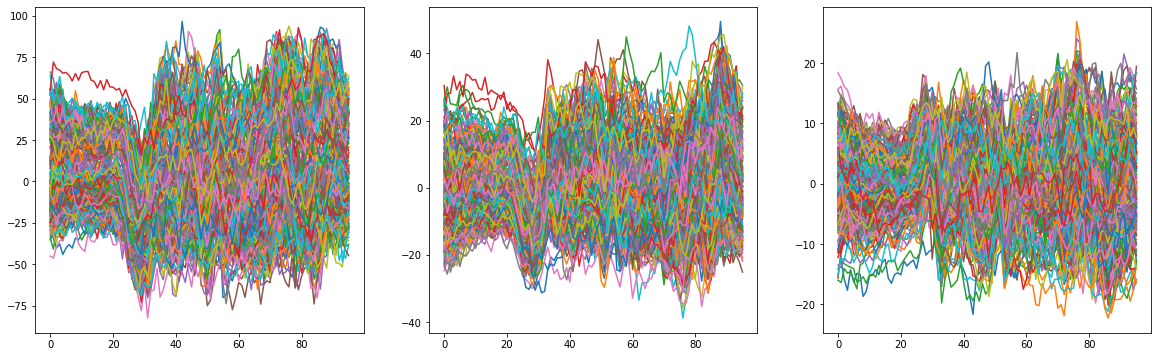

In [10]:
month = np.arange(12)
day = np.arange(20)
time_interval = np.arange(96)

plt.figure(figsize=(20,6))
'''print('origianl mi',Z_ex['im'].shape)
Z_ex['im']=Z_ex['im'].transpose(0,1,3,2)
print(Z_ex['im'][0,0,0].shape)
print(Z_ex['im'].shape)
'''
month_label=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for component in range(3):
    plt.subplot(1,3,component+1)
    for month in range(12):
        for day in range(20):
            month_dimension_list=[]
            for interval in range(96):
                month_dimension_list.append(Z_ex['m'][component,day,interval,month])
            plt.plot(time_interval,month_dimension_list,label='month {} day {}'.format(month+1,day+1))


'''
for m in range(12):
    plt.plot(time_interval, Z_ex['im'][0,0,m],label=month_label[m])'''

'''plt.legend()
plt.title('im')

print('original:',Z_ex['di'].shape)
Z_ex['di']=Z_ex['di'].transpose(0,3,1,2)
plt.subplot(122)
print(Z_ex['di'].shape)


for d in range(20):
    day_label = str(d+1)
    plt.plot(time_interval, Z_ex['di'][0,0,d],label=day_label)
plt.legend()
plt.title('di')
plt.show()'''

{'d': [0.00014853581, 1.015542e-05, 1.9421236e-06, 1.779876e-06, 8.680458e-07, 2.444086e-07, 9.820883e-08, 2.7139434e-08, 1.2260612e-08, 4.991278e-09], 'i': [0.49043745, 0.044725593, 0.012922483, 0.0032897128, 0.0007613644, 0.0002148846, 3.966115e-05, 2.633804e-05, 1.8670025e-05, 1.134703e-05], 'm': [0.05965247, 0.009685911, 0.0027966304, 0.0010190306, 0.00036165738, 0.000100520134, 2.1001504e-05, 6.558867e-06, 1.9625038e-06, 1.0282208e-07], 'di': [2.8907249e-05, 1.7353046e-05, 1.086947e-05, 6.02217e-06, 3.049048e-06, 2.1607652e-06, 1.04849e-06, 8.144669e-07, 6.155936e-07, 4.8773563e-07], 'dm': [0.023855364, 0.0017210335, 0.0005625779, 0.00044158002, 0.00038225538, 0.00018660705, 7.0817376e-05, 3.146283e-05, 2.790346e-05, 1.7162087e-05], 'im': [0.009377902, 0.0012963483, 0.00039865827, 0.00019893303, 0.00010165139, 2.9444374e-05, 2.6542626e-05, 1.1173821e-05, 7.4463924e-06, 5.144803e-06], 'dim': [0.007359007, 0.003229755, 0.0020079152, 0.001472185, 0.0004314208, 0.00031256265, 0.000258

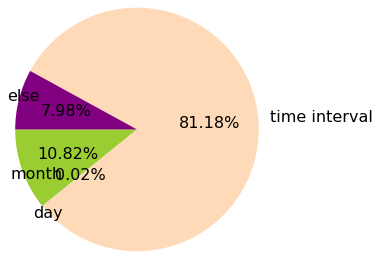

In [6]:
exv_ex = dpca_ex.explained_variance_ratio_
print(exv_ex)
m=sum(exv_ex['m'])
d=sum(exv_ex['d'])
i=sum(exv_ex['i'])
else_ele=sum(exv_ex['dm']+exv_ex['im']+exv_ex['di']+exv_ex['dim'])
data_list = [m,d,i,else_ele]
data_list_norm = data_list/sum(data_list)
print(data_list)
labels=['month','day','time interval','else']
colors=['yellowgreen','lightskyblue','peachpuff','purple']
plt.axes(aspect='equal')
plt.pie(x = data_list_norm, 
        labels=labels, 
        colors=colors,
        autopct='%.2f%%',
        startangle = 180,
        textprops = {'fontsize':16, 'color':'k'},
        center = (1.5,1.5),
        radius = 1.4)
plt.savefig('./pics/pie_dpca_new.jpg')
explained_var_dpca=sum(data_list)
print(explained_var_dpca)

In [7]:
'''dpca_list=[]
dpca_explained_var=[]
for i in range (15):
    print(i)
    dd = dPCA.dPCA(labels='dim',regularizer=None,n_components=i+1)
    ZZ = dd.fit_transform(data,trail_data)
    dpca_explained_var.append(dd.explained_variance_ratio_)

print(dpca_explained_var)


label = np.arange(1,16)
d_dpca_list=[]
i_dpca_list=[]
m_dpca_list=[]
for i in dpca_explained_var:
    d_dpca_list.append(sum(i['d']))
    i_dpca_list.append(sum(i['i']))
    m_dpca_list.append(sum(i['m']))
d = []
for i in range(0, len(s_list)):
    sum = s_dpca_list[i] + t_dpca_list[i]
    d.append(sum)

p1 = plt.bar(label, d_dpca_list, width=0.45, color='blue',label='d')  
p2 = plt.bar(label, i_dpca_list, width=0.45, bottom=s_dpca_list,color='green',label='i')  
p3 = plt.bar(label, m_dpca_list, width=0.45, bottom=d,color='red',label='m') 
plt.show()'''

"dpca_list=[]\ndpca_explained_var=[]\nfor i in range (15):\n    print(i)\n    dd = dPCA.dPCA(labels='dim',regularizer=None,n_components=i+1)\n    ZZ = dd.fit_transform(data,trail_data)\n    dpca_explained_var.append(dd.explained_variance_ratio_)\n\nprint(dpca_explained_var)\n\n\nlabel = np.arange(1,16)\nd_dpca_list=[]\ni_dpca_list=[]\nm_dpca_list=[]\nfor i in dpca_explained_var:\n    d_dpca_list.append(sum(i['d']))\n    i_dpca_list.append(sum(i['i']))\n    m_dpca_list.append(sum(i['m']))\nd = []\nfor i in range(0, len(s_list)):\n    sum = s_dpca_list[i] + t_dpca_list[i]\n    d.append(sum)\n\np1 = plt.bar(label, d_dpca_list, width=0.45, color='blue',label='d')  \np2 = plt.bar(label, i_dpca_list, width=0.45, bottom=s_dpca_list,color='green',label='i')  \np3 = plt.bar(label, m_dpca_list, width=0.45, bottom=d,color='red',label='m') \nplt.show()"

In [8]:
print('begin eedpca')
ee_dpca_ex=ee_dpca.EE_dPCA(labels='dim',rho=8e-3, regularizer=None)
# ee_dpca_ex.protect = ['m']
ZZ_ex=ee_dpca_ex.fit_transform(data,trail_data)
print('end eedpca')

begin eedpca
original X.shape (30, 20, 96, 12)
in _optimzie <class 'numpy.ndarray'>
start cross-val to get best lams
original X.shape (30, 20, 96, 12)
lambda 1e-05 tau 1e-05
key d


[0.47879450161034676, 0.042304717089275856, 0.011545124610362325, 0.002747808689381187, 0.000559745178829726, 0.0001493634523519255, 2.7686079087119888e-05, 1.8279834085667093e-05, 1.3125634361519579e-05, 7.849210063995596e-06]
[0.06952477905715852, 0.0001125360513514756, 0.536168201388146, 0.0477386864164835]
in ee_dpca,explained_var 0.6535442029131395


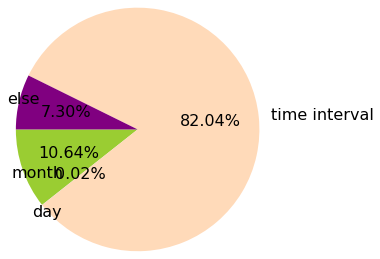

In [9]:
ee_exv_ex = ee_dpca_ex.explained_variance_ratio_
ee_m=sum(ee_exv_ex['m'])
ee_d=sum(ee_exv_ex['d'])
ee_i=sum(ee_exv_ex['i'])
ee_else=sum(ee_exv_ex['dm'])+sum(ee_exv_ex['im'])+sum(ee_exv_ex['di'])+sum(ee_exv_ex['dim'])
ee_data_list = [ee_m,ee_d,ee_i,ee_else]
# print(ee_data_list)
labels=['month','day','time interval','else']
colors = ['yellowgreen','lightskyblue','peachpuff','purple']

ee_data_list_norm = ee_data_list/sum(ee_data_list)
plt.axes(aspect='equal')
plt.pie(x = ee_data_list_norm, 
        labels=labels, 
        colors=colors,
        autopct='%.2f%%',
        startangle = 180,
        radius = 1.4,
        textprops = {'fontsize':16, 'color':'k'},
        center = (1.5,1.5) )
plt.savefig('./pics/pie_eedpca.jpg')

ee_explained_var_dpca=sum(ee_data_list)
print(ee_exv_ex['i'])
print(ee_data_list)
print('in ee_dpca,explained_var',ee_explained_var_dpca)

In [10]:
data_pca = np.reshape(data,[N,-1])

6664e+08
   3.47512310e+07 5.60630423e+07 1.95590012e+08]]

 [[3.03563558e+06 4.43685104e+08 2.39581306e+08 1.22997925e+08
   4.06909728e+07 7.16897361e+07 2.33055407e+08]
  [3.03414766e+06 4.41840361e+08 2.37398493e+08 1.22982960e+08
   4.06671474e+07 7.16046825e+07 2.28968180e+08]
  [3.03145123e+06 4.38645529e+08 2.33531884e+08 1.22895926e+08
   4.04899203e+07 7.15670424e+07 2.27618697e+08]
  [3.02679896e+06 4.33493155e+08 2.27061426e+08 1.22791057e+08
   4.02456605e+07 7.14593349e+07 2.28025318e+08]
  [3.01929034e+06 4.25644445e+08 2.16919459e+08 1.22667383e+08
   3.96651703e+07 7.13241449e+07 2.25590157e+08]
  [3.00823067e+06 4.14532898e+08 2.02174041e+08 1.22471865e+08
   3.90473380e+07 7.13054962e+07 2.23788219e+08]
  [2.99393950e+06 4.00254022e+08 1.82940826e+08 1.22192410e+08
   3.81440638e+07 7.12783021e+07 2.19179633e+08]
  [2.97857040e+06 3.85675785e+08 1.61633902e+08 1.21880626e+08
   3.69552617e+07 7.09662848e+07 2.15229707e+08]
  [2.96552887e+06 3.76105443e+08 1.42328285e

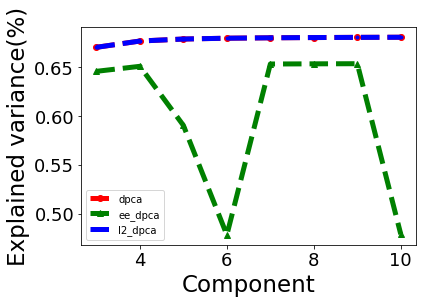

In [13]:
# dpca_list=[]
dpca_explained_var=[]
l2_dpca_explained_var=[]
ee_dpca_explained_var=[]

for i in range (2,10):
    # print(i)
    dd = dPCA.dPCA(labels='dim',regularizer=None,n_components=i+1)
    l2_dd = dPCA.dPCA(labels='dim',regularizer='auto',n_components=i+1)
    l2_dd.protect=['m']
    ee_dd = ee_dpca.EE_dPCA(labels='dim',rho=8e-3, regularizer=None,n_components=i+1)
    ZZ = dd.fit_transform(data,trail_data)
    l2_ZZ = l2_dd.fit_transform(data,trail_data)
    ee_ZZ = ee_dd.fit_transform(data,trail_data)
    exp = dd.explained_variance_ratio_
    l2_exp = dd.explained_variance_ratio_
    ee_exp = ee_dd.explained_variance_ratio_
    sum_exp = sum(exp['dm'])+sum(exp['im'])+sum(exp['di'])+sum(exp['dim'])+sum(exp['d'])+sum(exp['m'])+sum(exp['i'])
    l2_sum_exp = sum(l2_exp['dm'])+sum(l2_exp['im'])+sum(l2_exp['di'])+sum(l2_exp['dim'])+sum(l2_exp['d'])+sum(l2_exp['m'])+sum(l2_exp['i'])
    ee_sum_exp = sum(ee_exp['dm'])+sum(ee_exp['im'])+sum(ee_exp['di'])+sum(ee_exp['dim'])+sum(ee_exp['d'])+sum(ee_exp['m'])+sum(ee_exp['i'])
    dpca_explained_var.append(sum_exp)
    l2_dpca_explained_var.append(sum_exp)
    ee_dpca_explained_var.append(ee_sum_exp)

x1 = np.arange(2,10)+1

print(dpca_explained_var)
print(l2_dpca_explained_var)
print(ee_dpca_explained_var)

l1=plt.plot(x1,dpca_explained_var,'r--',label='dpca',marker='o',linewidth=5)
l2=plt.plot(x1,ee_dpca_explained_var,'g--',label='ee_dpca',marker='^',linewidth=5)
l3=plt.plot(x1,l2_dpca_explained_var,'b--',label='l2_dpca',marker='.',linewidth=5)

plt.xlabel('Component',size=23)
plt.ylabel('Explained variance(%)',size=23)
plt.tick_params(labelsize=18)
plt.legend()
plt.show()

